### 로지스틱 회귀 분석

로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수  μ 가 독립변수  x 에 의존한다고 가정한다.

$p(y∣x)=Bin(y;μ(x),N)$

위 식에서 보듯이 로지스틱 함수는  y 의 값이 특정한 구간내의 값( 0∼N )만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.

또는 이항 분포의 특별한 경우( N=1 )로  y 가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$ p(y∣x)=Bern(y;μ(x)) $
 
종속변수  y 가 0또는 1인 분류 예측 문제를 풀 때는  x  값을 이용하여  μ(x) 를 예측한 후 다음 기준에 따라  y^ 값을 출력한다.

$ y^={10 if μ(x)≥0.5 if μ(x)<0.5 $

회귀분석을 할 때는  y^ 으로  y=1 이 될 확률값  μ(x) 를 직접 사용한다.

$y^=μ(x)$

### 시그모이드 함수

로지스틱 회귀모형에서는 베르누이 확률분포의 모수  μ 가  x 의 함수라고 가정한다.  μ(x) 는  x 에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 __시그모이드함수(sigmoid function)__ 라는 함수를 사용하여 변형한 것을 사용한다.

AttributeError: module 'scipy' has no attribute 'special'

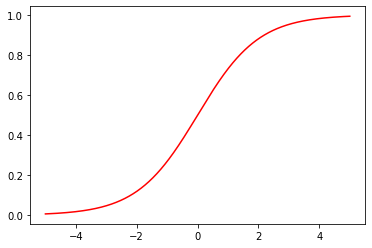

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

#### 로지스틱함수


로지스틱함수는 음의 무한대부터 양의 무한대까지의 실수값을 0부터 1사이의 실수값으로 1 대 1 대응시키는 시그모이드함수다. 보통 시그모이드함수라고 하면 로지스틱함수를 가리킨다. 로지스틱함수는 다음 과정을 통해 정의되었다.

베르누이 시도에서 1이 나올 확률  μ 와 0이 나올 확률  1−μ 의 비율(ratio)을 승산비(odds ratio)라고 한다.

$odds ratio=μ1−μ$
 
0부터 1사이의 값만 가지는  μ 를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로지트함수(Logit function)다.

$z=logit(odds ratio)=log(μ1−μ)$
 
로지트함수의 값은 로그 변환에 의해 음의 무한대( −∞ )부터 양의 무한대( ∞ )까지의 값을 가질 수 있다.

로지스틱함수(Logistic function)는 로지트함수의 역함수이다. 즉 __음의 무한대( −∞ )부터 양의 무한대( ∞ )까지의 값을 가지는 입력변수를 0부터 1사의 값을 가지는 출력변수로 변환__ 한 것이다.



#### 선형 판별함수
로지스틱함수  σ(z) 를 사용하는 경우에는  z 값과  μ 값은 다음과 같은 관계가 있다.

- z=0 일 때  μ=0.5 
- z>0 일 때  μ>0.5→y^=1 
- z<0 일 때  μ<0.5→y^=0 
즉  z 가 분류 모형의 판별함수(decision function)의 역할을 한다. 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용한다.

$z=w^Tx$

#### 로지스틱 회귀분석 모형의 모수 추정

로지스틱 회분석 모형의 모수 w는 최대가능도(MLE)방법으로 추정할 수 있다.


#### 수치적 최적화

J = -LL

최대 경사도 방법 사용

그레디언트 벡터

$ g_k = \dfrac{d}{dw}(-LL)$

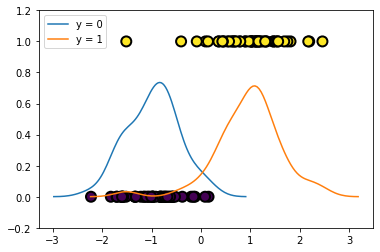

In [7]:
from sklearn.datasets import make_classification
import seaborn as sns
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [9]:
import sympy as sm
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

AttributeError: module 'sympy' has no attribute 'add_constant'